<a href="https://colab.research.google.com/github/sharithomas/ML-AI/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA and Data Pre proceesing**

•	**Data Preprocessing** is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

**Need of Data Preprocessing**

•	For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.
•	Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
•	 Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.


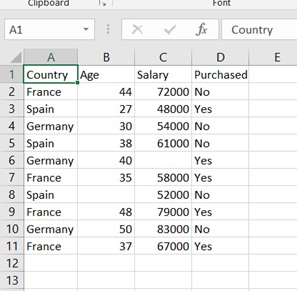

We are using this data set for preprocessing. Customer information with details (3 columns), last column Purchased .

•	Here we need to know two types of variables:

**Dependent variable and Independent variable**

•	Country Age Salary are independent variables and Purchase is dependent variable.

“So in Machine Learning algorithms we use independent variable to predict value of dependent variable”


**Preparing the data**

**1.	Handling Missing data**

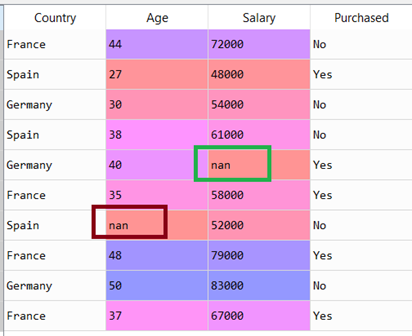

One way to solve this is just remove the column. But this might give wrong model.Another idea is to replace by the mean, median etc of remaining fields.

Dealing the same in python
Either we can create a function to calculate the mean of each column of the dependent data set , and replace the missing values with them.

Something like below;

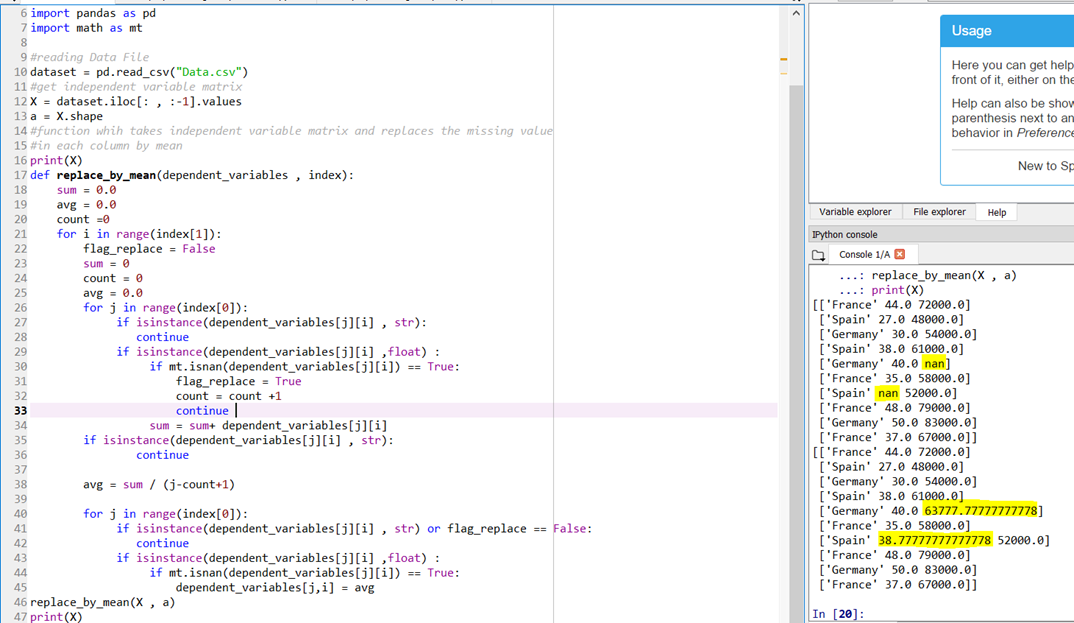

Another way

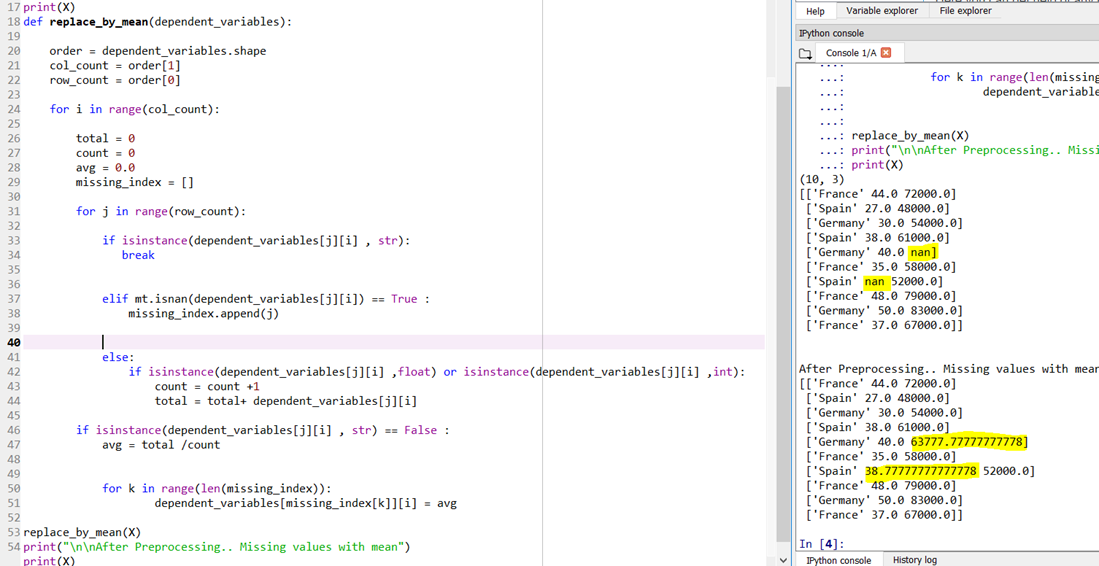

OR

Use an existing library.(we use scikit-learn for that)


For our preprocessing, we have a library sklearn.preprocessing. (where sklearn stands for scikit learn).
This library has got many classes, and Imputer class is one among them.


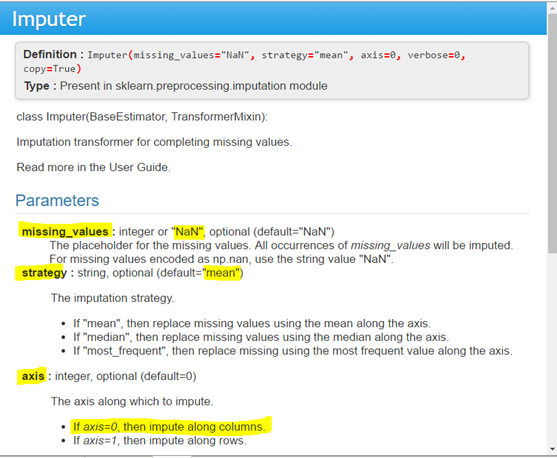

Use fit method of Imputer class to fit the data , and transform method to do the actual transformation

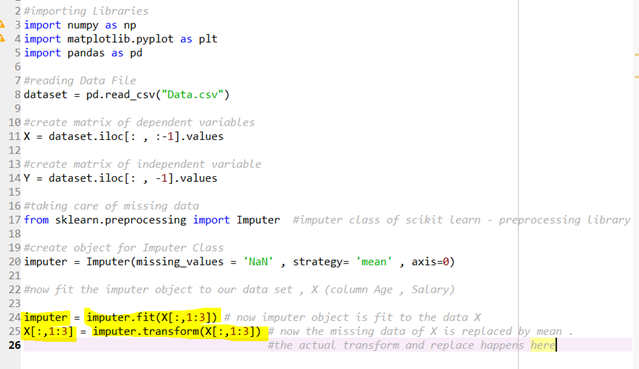

New code after replacing obsolete Imputer with SimpleImputer class

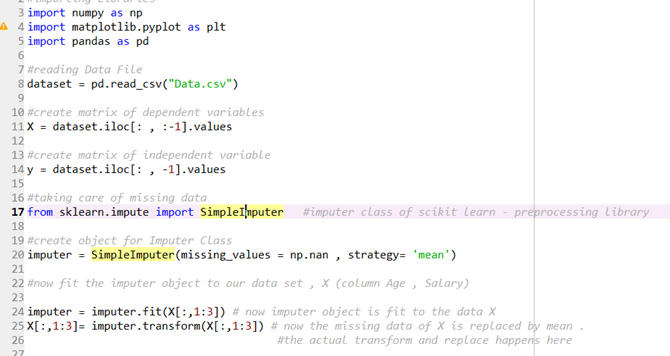

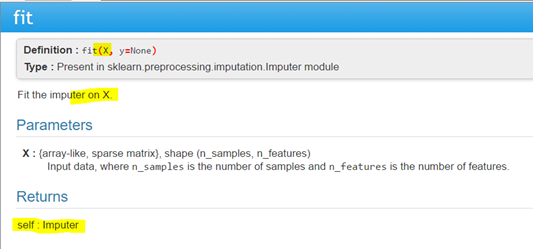

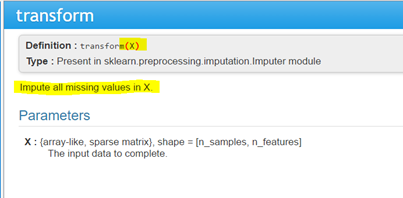

Which gives our new data set as ;

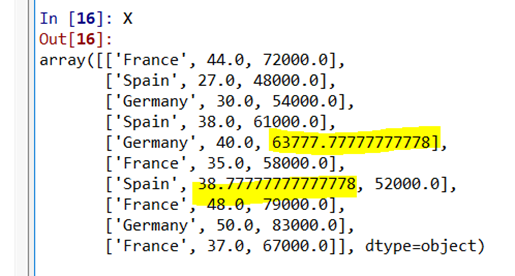

•	We can use the median strategy or most frequent value strategy also to replace the missing values

Hence, every sklearn's transform's fit() just calculates the parameters  and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

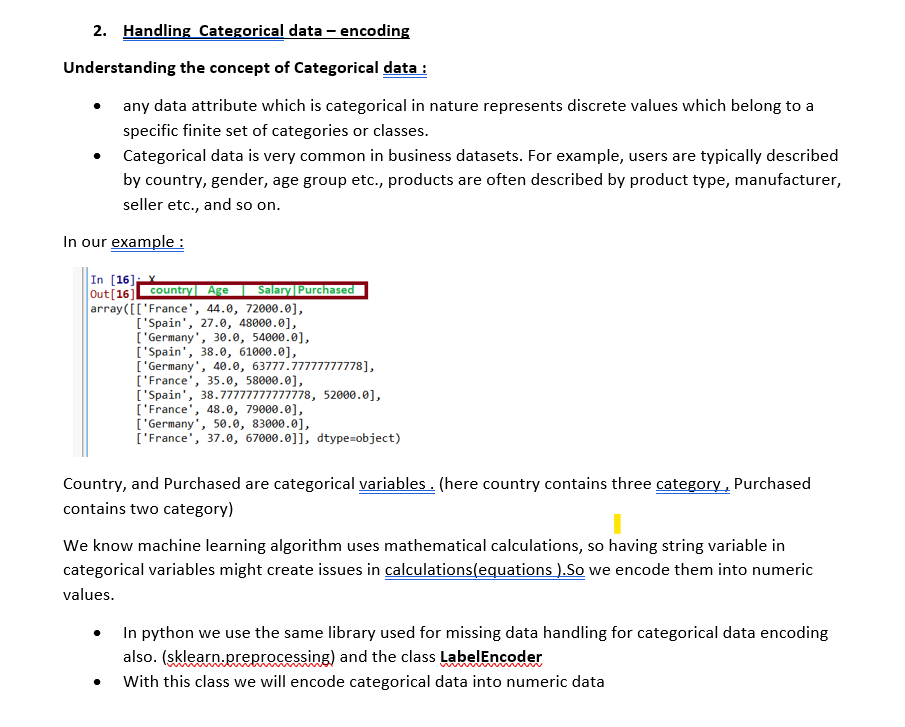

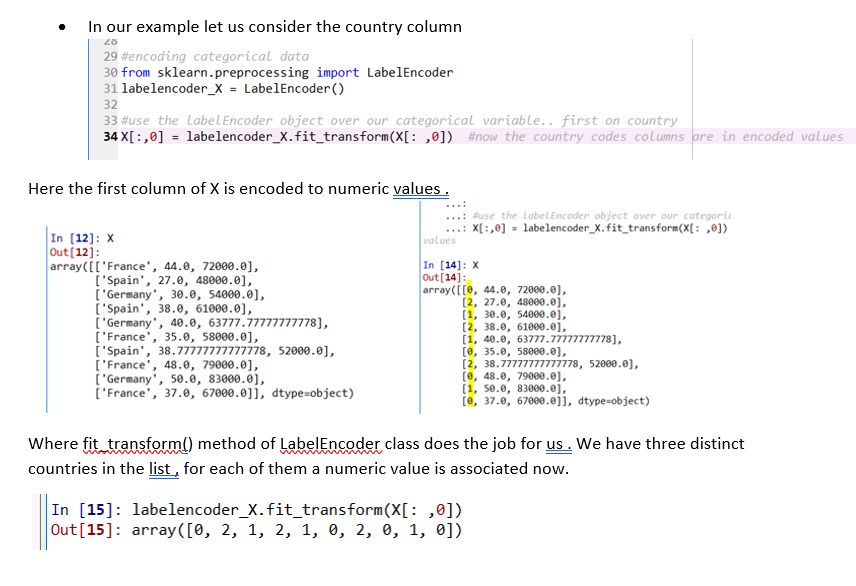

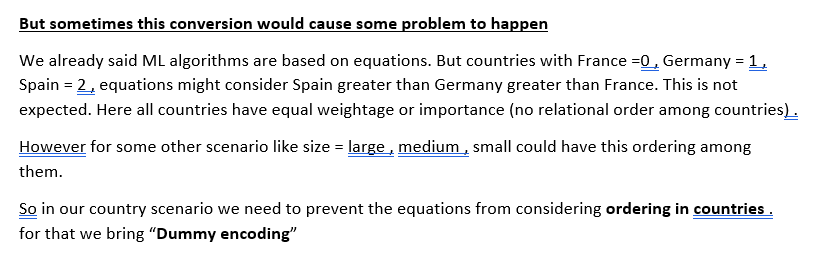

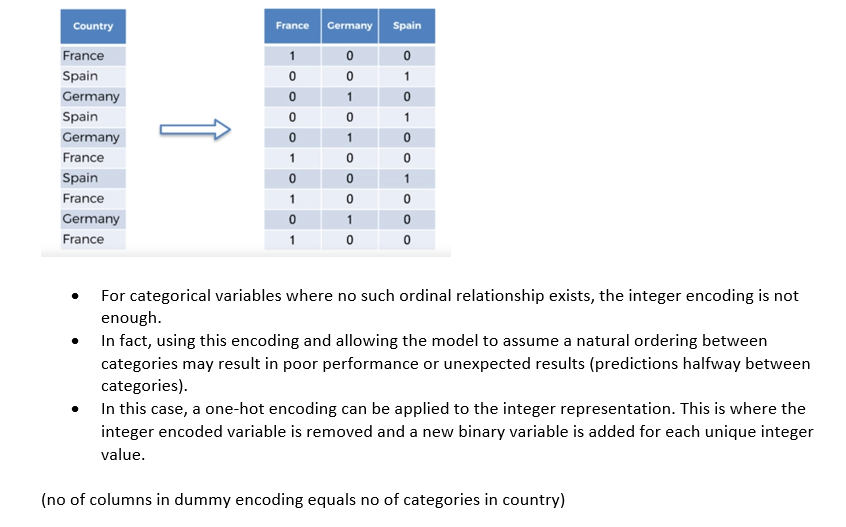

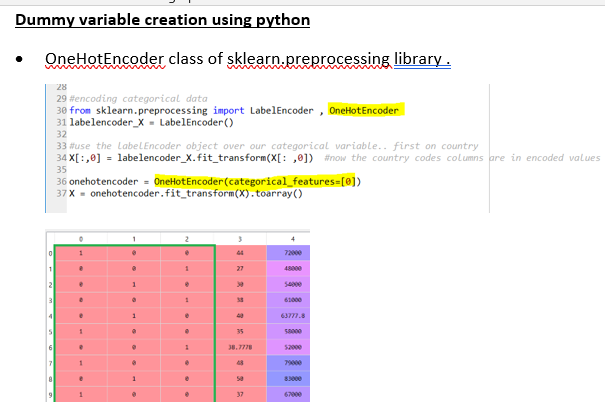

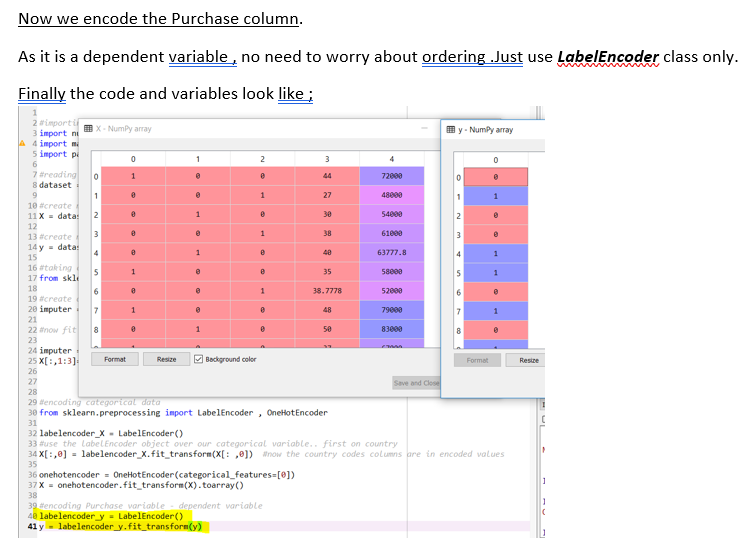

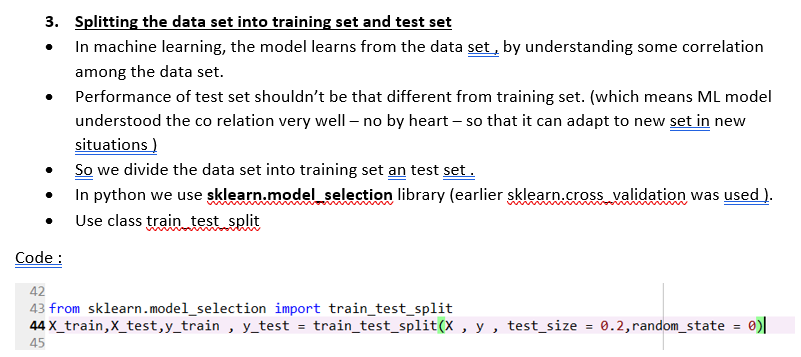

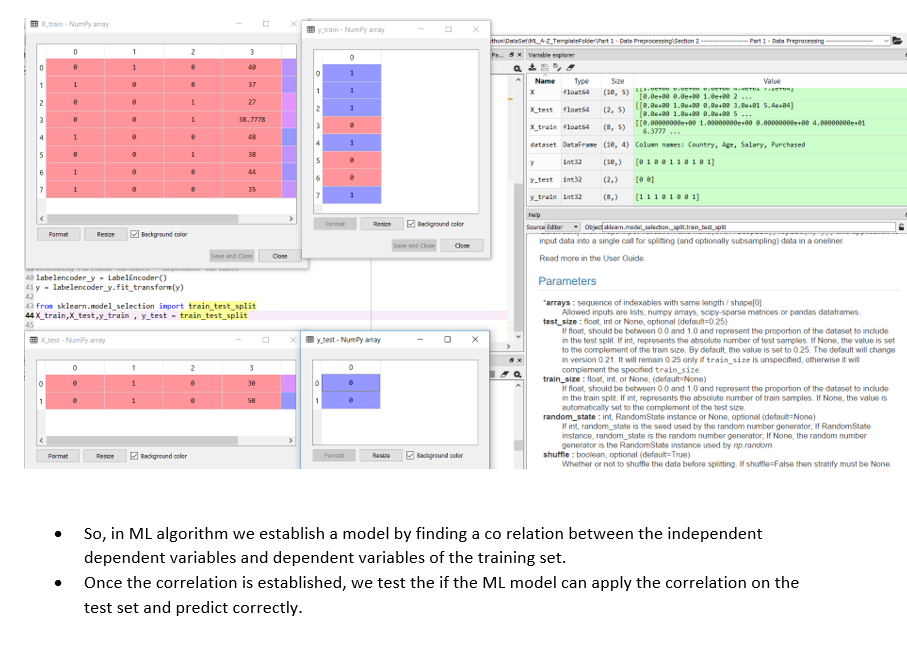

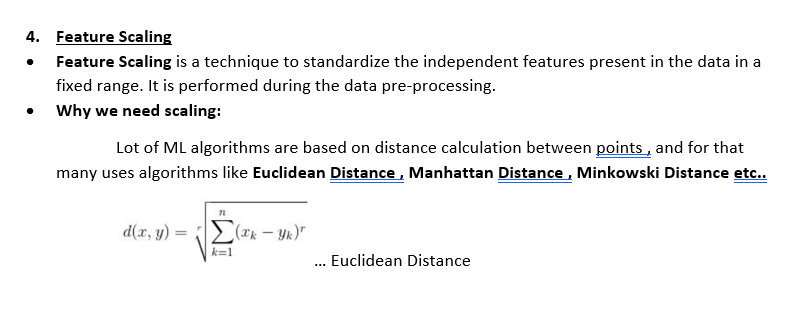

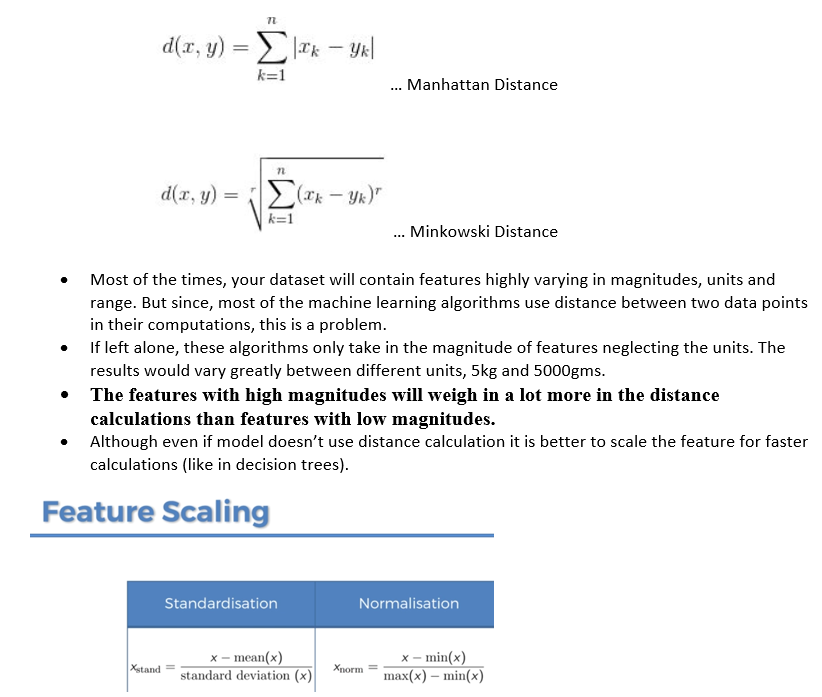

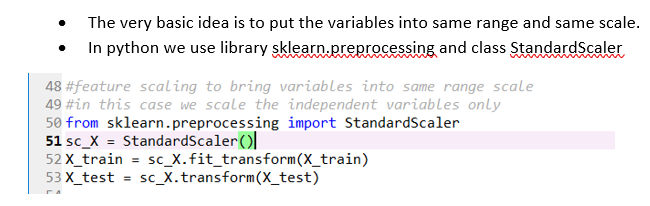

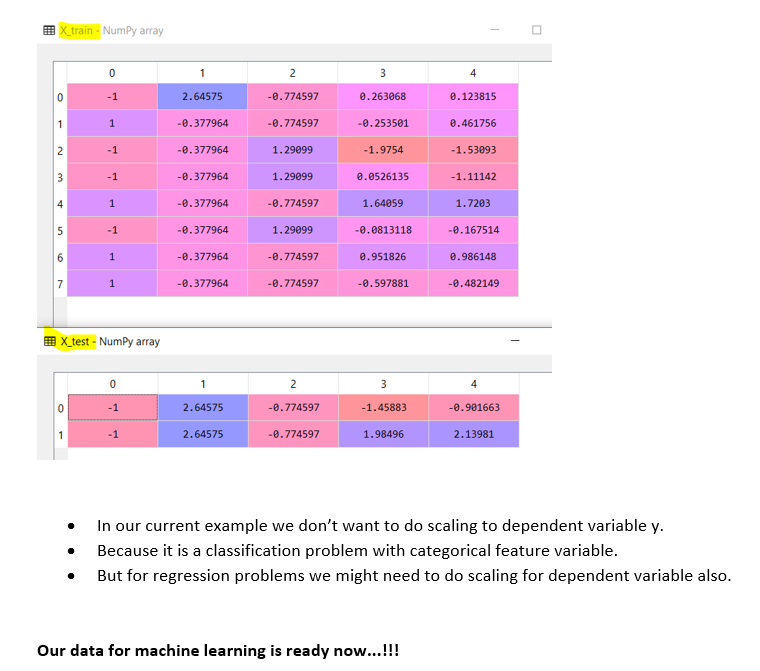

The complete code looks like:

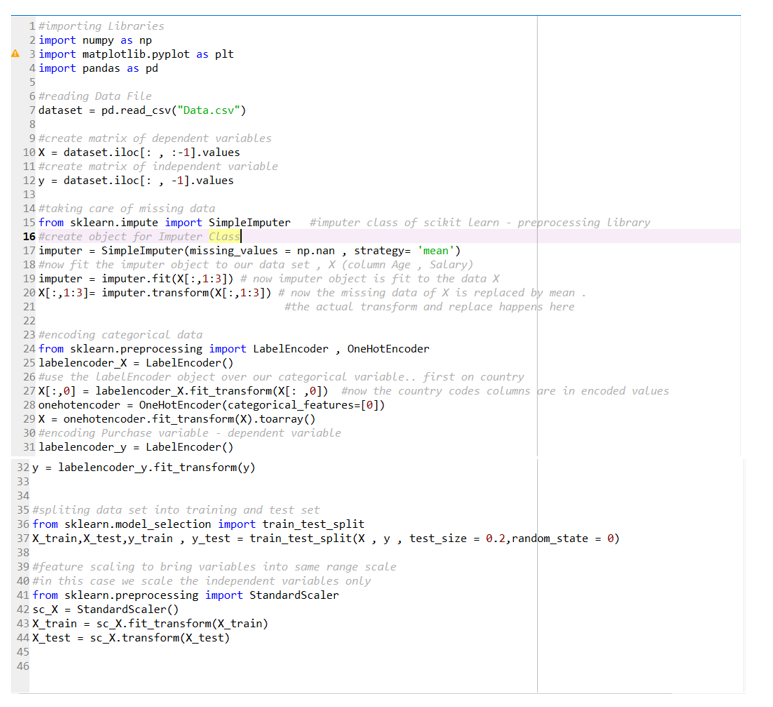

**Example for Preprocessing method1**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/Housing_Price.csv")
df.head()
col=df.columns
type(col)

pandas.core.indexes.base.Index

In [ ]:
for var in col:
    print(var)

Id
Length
Width
Floor
Corner
Special_Feature
Balcony_Area
Price


In [ ]:
df.tail()
#df.head()

,Id,Length,Width,Floor,Corner,Special_Feature,Balcony_Area,Price
45,46,69.0,60.0,NaN,0,No_Special_Feature,198.00,20970000
46,47,53.0,53.0,15.0,0,Pool_Facing,136.45,14520000
47,48,52.0,47.0,8.0,1,Mountain_Facing,106.20,13060000
48,49,62.0,35.0,13.0,0,Mountain_Facing,112.50,11215000
49,50,65.0,30.0,15.0,0,Pool_Facing,91.50,10225000


In [ ]:
df.dtypes

,0
Id,int64
Length,float64
Width,float64
Floor,float64
Corner,int64
Special_Feature,object
Balcony_Area,float64
Price,int64


In [ ]:
#Check for null values
df.isnull().sum()
df.isnull().mean()*100

,0
Id,0.0
Length,12.0
Width,12.0
Floor,6.0
Corner,0.0
Special_Feature,8.0
Balcony_Area,0.0
Price,0.0


In [ ]:
cat_var_list=['Corner','Special_Feature']
num_var_list=['Id','Length','Width','Floor','Balcony_Area','Price']

In [ ]:
df.Special_Feature.mode()

,Special_Feature
0,Pool_Facing


In [ ]:
type(df.Special_Feature.mode())

pandas.core.series.Series

In [ ]:
df.Special_Feature.mode().iloc[0]

'Pool_Facing'

In [ ]:
df.Length.mean()

np.float64(99.22727272727273)

In [ ]:
#Impute function definition for categorical(mode) and numerical variable(mean)
def impute_na_cat(df,variable):
    return df[variable].fillna(df[variable].mode().iloc[0]) # to access value Pool_Facing from series  0    Pool_Facing

for var in cat_var_list:
    df[var]=impute_na_cat(df,var)

df.isnull().sum()

,0
Id,0
Length,6
Width,6
Floor,3
Corner,0
Special_Feature,0
Balcony_Area,0
Price,0


In [ ]:
def impute_na_num(df,variable):
    return df[variable].fillna(df[variable].mean())

for var in num_var_list:
    df[var]=impute_na_num(df,var)

df.isnull().sum()

,0
Id,0
Length,0
Width,0
Floor,0
Corner,0
Special_Feature,0
Balcony_Area,0
Price,0


<Axes: xlabel='Length'>

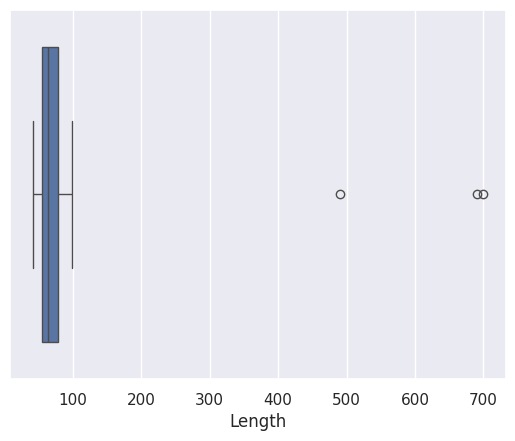

In [ ]:
#to check outlier
sns.boxplot(x=df['Length'])


<Axes: xlabel='Width'>

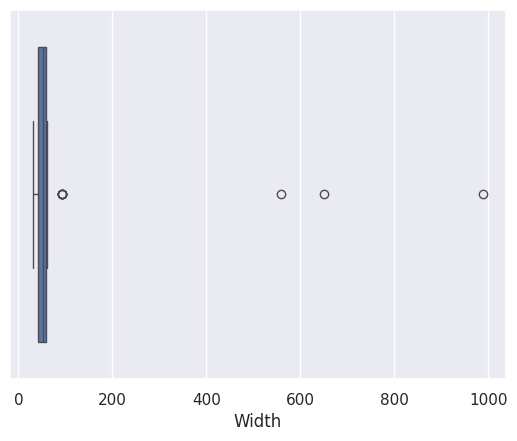

In [ ]:
sns.boxplot(x=df['Width'])

<Axes: xlabel='Floor'>

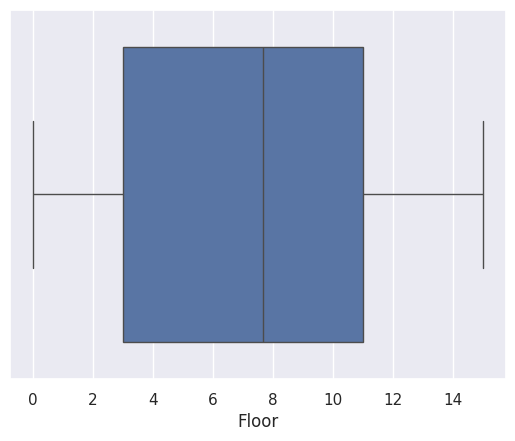

In [ ]:
sns.boxplot(x=df['Floor'])

In [ ]:
#Converting categorical variable to number
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Special_Feature']=le.fit_transform(df['Special_Feature'])
df.head()

,Id,Length,Width,Floor,Corner,Special_Feature,Balcony_Area,Price
0,1,58.0,44.00,13.0,1,0,139.60,13525000
1,2,66.0,37.00,2.0,0,1,130.10,12520000
2,3,57.0,93.75,11.0,1,3,113.45,11500000
3,4,59.0,990.00,13.0,0,2,144.75,13340000
4,5,54.0,56.00,4.0,0,2,138.20,15140000


In [ ]:
df['Area']=df['Length']*df['Width']
df=df.drop(['Length','Width'],axis=1)
df.head()

,Id,Floor,Corner,Special_Feature,Balcony_Area,Price,Area
0,1,13.0,1,0,139.60,13525000,2552.00
1,2,2.0,0,1,130.10,12520000,2442.00
2,3,11.0,1,3,113.45,11500000,5343.75
3,4,13.0,0,2,144.75,13340000,58410.00
4,5,4.0,0,2,138.20,15140000,3024.00


In [ ]:
##remove outliers using the IQR (Interquartile Range) method
# if your df contains non-numeric columns, it will throw an error
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Id                 2.450000e+01
Floor              8.000000e+00
Corner             1.000000e+00
Special_Feature    2.000000e+00
Balcony_Area       5.052500e+01
Price              4.525000e+06
Area               2.020705e+03
dtype: float64


In [ ]:
df.shape

(50, 7)

In [ ]:
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)] # Only keep rows where all numeric columns are within [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df.shape

(43, 7)

<Axes: >

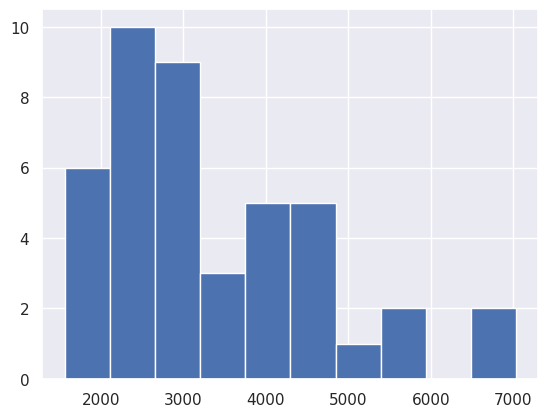

In [ ]:
#Histogrm
df['Area'].hist()

<Axes: >

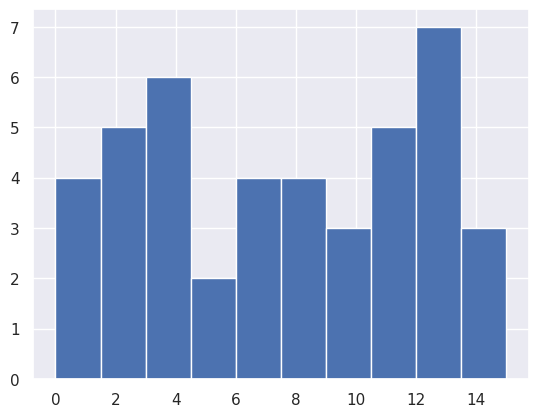

In [ ]:
df.Floor.hist()

,Id,Floor,Corner,Special_Feature,Balcony_Area,Price,Area
Id,1.000000,0.231623,-0.222599,0.011954,0.069010,0.162850,-0.017026
Floor,0.231623,1.000000,-0.286672,0.017193,-0.125847,-0.164576,0.044693
Corner,-0.222599,-0.286672,1.000000,0.152161,0.064237,0.052118,0.259819
Special_Feature,0.011954,0.017193,0.152161,1.000000,-0.122385,-0.170605,-0.061543
Balcony_Area,0.069010,-0.125847,0.064237,-0.122385,1.000000,0.957820,0.378432
Price,0.162850,-0.164576,0.052118,-0.170605,0.957820,1.000000,0.386959
Area,-0.017026,0.044693,0.259819,-0.061543,0.378432,0.386959,1.000000


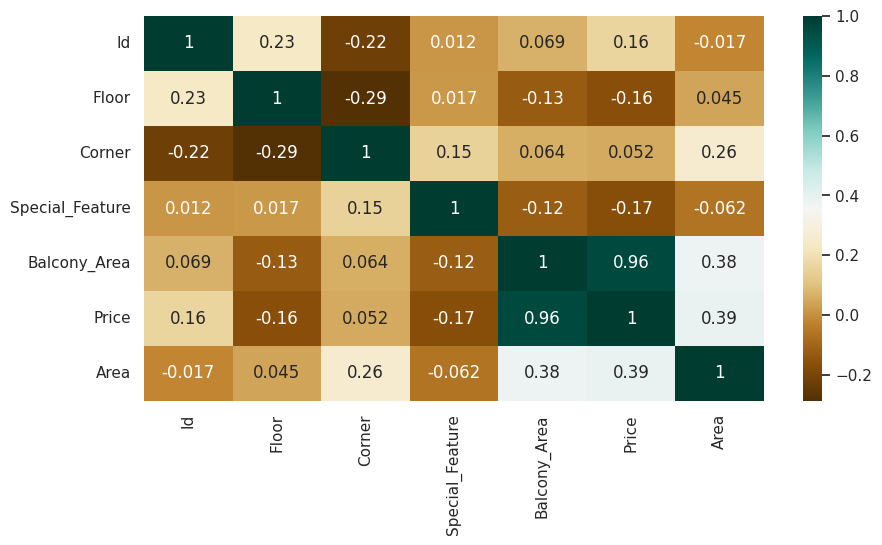

In [ ]:
#Heatmap
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True) #annot=true then write the data value in each cell.
c

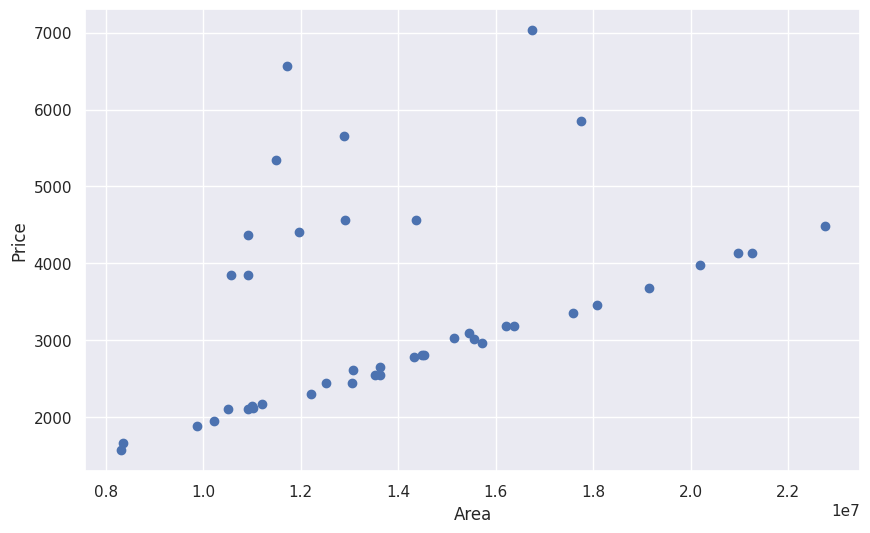

In [ ]:
#Scatter plots
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df['Price'],df['Area'])
ax.set_xlabel('Area')
ax.set_ylabel('Price')
plt.show()


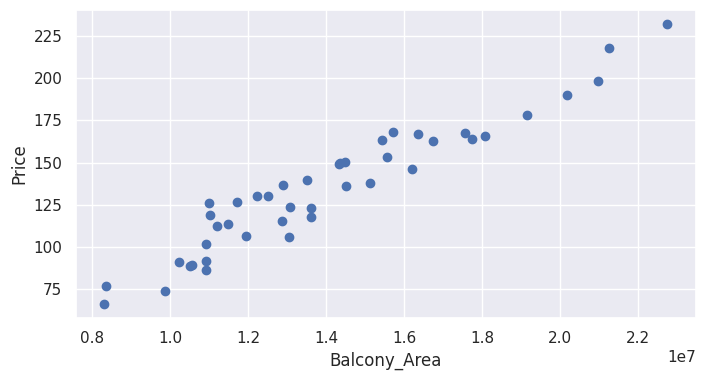

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['Price'], df['Balcony_Area'])
ax.set_xlabel('Balcony_Area')
ax.set_ylabel('Price')
plt.show()


**#Preprocessing method2**

In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
df=pd.read_csv("/content/Housing_Price.csv")
df.head(5) #display first five rows of dataframe default is 5
col=df.columns
type(col)

for var in col:
    print(var)

df.tail() #display last five rows of dataframe default is 5
df.dtypes #return datatypes of all variables in the dataframe and if datatype is object mean its categorical variable

df.isnull().sum() # count the NaN in each columns
df.isnull().mean()*100 # percentage of NaN in each columns

num_var_list=['Length','Width','Floor','Balcony_Area']
cat_var_list=['Corner','Special_Feature']

df.Special_Feature.mode()
type(df.Special_Feature.mode())

df.Special_Feature.mode().iloc[0]
type(df.Special_Feature.mode().iloc[0])

df['Length'].mean()
type(df['Length'].mean())
df.Length.median()
type(df.Length.median())

#Impute null values for categorical and numerical variables
def impute_na_num(df,variable):
    return df[variable].fillna(df[variable].mean())

for var in num_var_list:
    print(var)
    df[var]=impute_na_num(df,var)

df.isnull().mean()

def impute_na_cat(df,variable):
    return df[variable].fillna(df[variable].mode().iloc[0]) # to access value Pool_Facing from series  0    Pool_Facing

for var in cat_var_list:
    print(var)
    df[var]=impute_na_cat(df,var)

df.isnull().mean()


Id
Length
Width
Floor
Corner
Special_Feature
Balcony_Area
Price
Length
Width
Floor
Balcony_Area
Corner
Special_Feature


,0
Id,0.0
Length,0.0
Width,0.0
Floor,0.0
Corner,0.0
Special_Feature,0.0
Balcony_Area,0.0
Price,0.0


<Axes: xlabel='Length'>

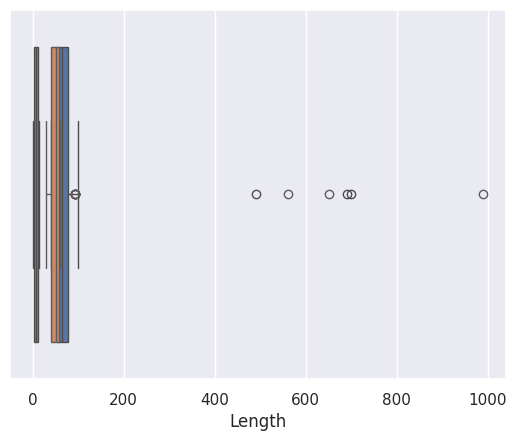

In [22]:
#to check outlier
sns.boxplot(x=df['Length'])
sns.boxplot(x=df['Width'])
sns.boxplot(x=df['Floor'])

In [23]:
df_out=df[['Length','Width']] # variables with outliers

<Axes: xlabel='Length'>

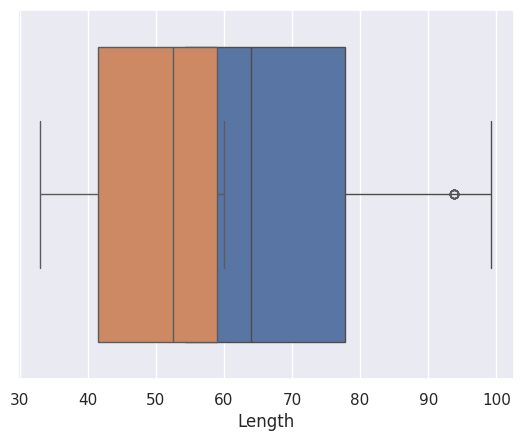

In [17]:
#caping outliers
lb=df_out.quantile(0.1)
ub=df_out.quantile(0.9)

df_out=df_out.clip(lower=df_out.quantile(0.1),upper=df_out.quantile(0.9),axis=1) # capping theoutliers values of length and width
df=df.drop(['Length','Width'],axis=1) # drop length and width from dataframe df
df=pd.concat([df,df_out],axis=1,join='inner') # concatenate df and df_out, join:inner(intersection) & outer(union)

sns.boxplot(x=df["Length"])
sns.boxplot(x=df["Width"])


In [24]:
df.head()

,Id,Length,Width,Floor,Corner,Special_Feature,Balcony_Area,Price
0,1,58.0,44.00,13.0,1,Garden_Facing,139.60,13525000
1,2,66.0,37.00,2.0,0,Mountain_Facing,130.10,12520000
2,3,57.0,93.75,11.0,1,Pool_Facing,113.45,11500000
3,4,59.0,990.00,13.0,0,No_Special_Feature,144.75,13340000
4,5,54.0,56.00,4.0,0,No_Special_Feature,138.20,15140000


In [25]:
df['Area']=df['Length']*df['Width']
df=df.drop(['Length','Width'],axis=1)
df.shape

(50, 7)

In [20]:
#Creating dummy variable, One hot encoding
dummy=pd.get_dummies(df['Special_Feature'])
df=pd.concat([df,dummy],axis=1)
df=df.drop(['Special_Feature'],axis=1)
df.head()

,Id,Floor,Corner,Balcony_Area,Price,Area,Garden_Facing,Mountain_Facing,No_Special_Feature,Pool_Facing
0,1,13.0,1,139.60,13525000,2552.00,True,False,False,False
1,2,2.0,0,130.10,12520000,2442.00,False,True,False,False
2,3,11.0,1,113.45,11500000,5343.75,False,False,False,True
3,4,13.0,0,144.75,13340000,5531.25,False,False,True,False
4,5,4.0,0,138.20,15140000,3024.00,False,False,True,False


In [26]:
#another way to treat dummy varaible by droping first coulmn of dummy varaibles this way we can save time and space
dummy=pd.get_dummies(df['Special_Feature'],drop_first=True)
df=pd.concat([df,dummy],axis=1)
df=df.drop(['Special_Feature'],axis=1)
df.head()

,Id,Floor,Corner,Balcony_Area,Price,Area,Mountain_Facing,No_Special_Feature,Pool_Facing
0,1,13.0,1,139.60,13525000,2552.00,False,False,False
1,2,2.0,0,130.10,12520000,2442.00,True,False,False
2,3,11.0,1,113.45,11500000,5343.75,False,False,True
3,4,13.0,0,144.75,13340000,58410.00,False,True,False
4,5,4.0,0,138.20,15140000,3024.00,False,True,False


In [27]:
df.columns

Index(['Id', 'Floor', 'Corner', 'Balcony_Area', 'Price', 'Area',
       'Mountain_Facing', 'No_Special_Feature ', 'Pool_Facing'],
      dtype='object')

In [29]:
new_order=['Id', 'Floor', 'Corner', 'Balcony_Area', 'Area',
       'Mountain_Facing', 'No_Special_Feature ', 'Pool_Facing', 'Price']
df=df[new_order]
df.head()

,Id,Floor,Corner,Balcony_Area,Area,Mountain_Facing,No_Special_Feature,Pool_Facing,Price
0,1,13.0,1,139.60,2552.00,False,False,False,13525000
1,2,2.0,0,130.10,2442.00,True,False,False,12520000
2,3,11.0,1,113.45,5343.75,False,False,True,11500000
3,4,13.0,0,144.75,58410.00,False,True,False,13340000
4,5,4.0,0,138.20,3024.00,False,True,False,15140000


In [30]:
df=df.drop(['Id'],axis=1)